# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [23]:
# Import numpy and pandas
import pandas as pd
import numpy as np


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [24]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [25]:
# Your code here:
hs =sensor.head()
hs


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [26]:
# Your code here:
sensor_null = sensor.isnull().sum()
sensor_null


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [27]:
# Your code here:
sensor_rows = len(sensor.axes[0])
sensor_cols = len(sensor.axes[1])
print('Rows = '+str(sensor_rows))
print('Columns = '+str(sensor_cols))


Rows = 1751
Columns = 12


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [28]:
# Your code here:
sensor.dtypes


attitude.roll         float64
attitude.pitch        float64
attitude.yaw          float64
gravity.x             float64
gravity.y             float64
gravity.z             float64
rotationRate.x        float64
rotationRate.y        float64
rotationRate.z        float64
userAcceleration.x    float64
userAcceleration.y    float64
userAcceleration.z    float64
dtype: object

In [29]:
sensor['date'] = pd.Series(pd.date_range(start='1/1/2018 00:00:00', 
                                         end='1/1/2018 00:29:10', periods=sensor.shape[0]))
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Assign the time series index to the dataframe's index.

In [30]:
# Your code here:
sensor.set_index('date', inplace=True)
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
date,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [40]:
# Your code here:

import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

In [41]:
sensor_index = sensor.reset_index()
sensor_index.head()

,date,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


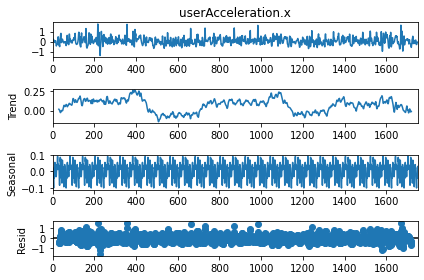

In [42]:
decomp= sm.tsa.seasonal_decompose(sensor_index['userAcceleration.x'], period = 60)
decomp.plot()
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

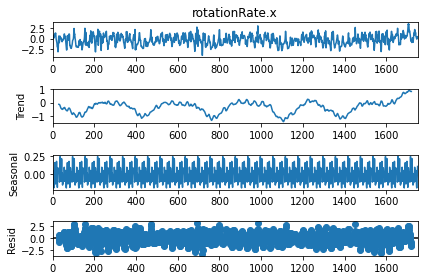

In [43]:
decomp1= sm.tsa.seasonal_decompose(sensor_index['rotationRate.x'], period = 60)
decomp1.plot()
plt.show()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

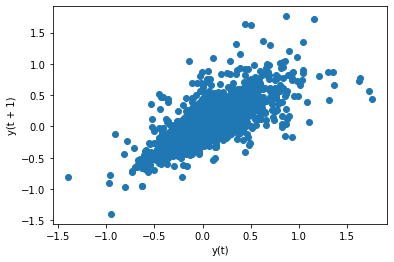

In [44]:
# Your code here:
pd.plotting.lag_plot(sensor_index['userAcceleration.x'], lag=1)


Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

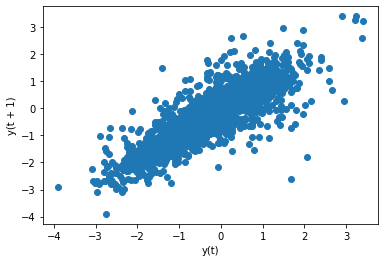

In [45]:
# Your code here:
pd.plotting.lag_plot(sensor_index['rotationRate.x'], lag=1)


What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:
#Bigger scattering in the second one


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [48]:
# Your code here:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(sensor_index['userAcceleration.x'])
test2 = adfuller(sensor_index['rotationRate.x'])

In [49]:
print(test1)
print(test2)

(-17.95799408616975, 2.823439483037483e-30, 4, 1746, {'1%': -3.434100824760071, '5%': -2.863196780129223, '10%': -2.5676520210882936}, -727.6140124402791)
(-5.269860625086422, 6.320230335912189e-06, 25, 1725, {'1%': -3.4341465551936534, '5%': -2.863216966926812, '10%': -2.567662770090317}, 2619.6049719981947)


What are your conclusions from this test?

In [13]:
# Your conclusions here:



Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [51]:
# Your code here:
from statsmodels.tsa.arima.model import ARIMA
sensor_last = sensor_index.tail(10)
model = ARIMA(sensor_last['userAcceleration.x'], order=(2,1,0))
model_fit = model.fit()


In [52]:
print(sensor_last)
print(model)
print(model_fit)

                    date  attitude.roll  attitude.pitch  attitude.yaw  \
1741 2018-01-01 00:29:01       1.634509       -0.539902      2.480230   
1742 2018-01-01 00:29:02       1.671799       -0.541547      2.463982   
1743 2018-01-01 00:29:03       1.707251       -0.545910      2.455201   
1744 2018-01-01 00:29:04       1.739734       -0.551012      2.445058   
1745 2018-01-01 00:29:05       1.771197       -0.555716      2.441679   
1746 2018-01-01 00:29:06       1.797120       -0.562324      2.445889   
1747 2018-01-01 00:29:07       1.814297       -0.569719      2.449655   
1748 2018-01-01 00:29:08       1.830821       -0.578367      2.447967   
1749 2018-01-01 00:29:09       1.849557       -0.586962      2.439458   
1750 2018-01-01 00:29:10       1.869375       -0.596783      2.433775   

      gravity.x  gravity.y  gravity.z  rotationRate.x  rotationRate.y  \
1741   0.856019   0.514052   0.054613        1.065054        2.373071   
1742   0.852545   0.515462   0.086403        0.497

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [53]:
# Your code here:
from statsmodels.tools.eval_measures import rmse
pred = model_fit.predict(start = 1742, end = 1751, dynamic = True)
pred

C:\Users\Administrator\miniconda3\envs\ironhack\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


3483   -0.079067
3484   -0.079067
3485   -0.079067
3486   -0.079067
3487   -0.079067
3488   -0.079067
3489   -0.079067
3490   -0.079067
3491   -0.079067
3492   -0.079067
Name: predicted_mean, dtype: float64

In [55]:
ARIMA_pred = rmse(sensor_last['userAcceleration.x'], pred)
ARIMA_pred

0.14048551970498113